# Answer to Question 1 :
Reading the csv file using pandas and storing it in a dataframe

In [45]:
import pandas as pd
data = pd.read_csv("C:\\Users\\VISHAL\\Documents\\Case Studies_10K\\Datasets-20200307T133324Z-001\\Datasets\\vote92.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [46]:
# Checking the shape of the data (dimensions)
data.shape

# 909 rows and 9 columns

(909, 9)

In [3]:
data.head()

,vote,dem,rep,female,persfinance,natlecon,clintondis,bushdis,perotdis
1,Bush,0,1,1,1,0,4.0804,0.1024,0.2601
2,Bush,0,1,1,0,-1,4.0804,0.1024,0.2601
3,Clinton,1,0,1,0,-1,1.0404,1.7424,0.2401
4,Bush,0,1,0,0,-1,0.0004,5.3824,2.2201
5,Clinton,0,0,1,0,-1,0.9604,11.0220,6.2001


# Answer to Question 2 :

The key objective of the case study is to  : 
Model on voter’s probability of voting for a candidate (Perot, Bush or Clinton) : based on the different predictor variables (viz. dem, rep, female, clintondis, bushdis, perotdis, persfinance, natlecon)

The response variable here is : vote ( 3 level variable ) 

The data collected in the given excel file is grouped under which data class : "Cross Sectional Data"

# Answer to Question 3 :

In [5]:
data.describe()

,dem,rep,female,persfinance,natlecon,clintondis,bushdis,perotdis
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,0.488449,0.430143,0.475248,-0.009901,-0.672167,3.506218,3.379256,2.171033
std,0.500142,0.495369,0.499662,0.817560,0.565438,3.889289,4.332017,2.659250
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000400,0.102400,0.240100
25%,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.960400,0.462400,0.240100
50%,0.000000,0.000000,0.000000,0.000000,-1.000000,1.040400,1.742400,2.220100
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4.080400,5.382400,2.280100
max,1.000000,1.000000,1.000000,1.000000,1.000000,16.160000,18.662000,12.180000


In [ ]:
# Observations :
# 416 observations (max) seen for Clinton under vote followed by 310 for Bush and 183 for Perot
# The average clintondes is 3.5 followed by bushdis : 3.38 and perotdis : 2.17

In [6]:
data.dtypes

vote            object
dem              int64
rep              int64
female           int64
persfinance      int64
natlecon         int64
clintondis     float64
bushdis        float64
perotdis       float64
dtype: object

# Answer to Question 4:

In [7]:
print(data["vote"])

# Vote : the response variable is a factor/categorical vatiable with 3 levels (Bush, Clinton & Perot)

1         Bush
2         Bush
3      Clinton
4         Bush
5      Clinton
        ...   
905    Clinton
906      Perot
907    Clinton
908       Bush
909       Bush
Name: vote, Length: 909, dtype: object


# Answer to Question 5 :

Plotting a histogram for the variable 'vote'

In [9]:
my_tab = pd.crosstab(index=data["vote"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
vote,
Bush,310
Clinton,416
Perot,183


Observations :
Highest choice of support is for Clinton with 416 votes and least is for Perot with 183 votes

# Answer to Question 6:

In [13]:
# Table of treatment group vs. sex
trt_sex = pd.crosstab(index=data["female"], 
                           columns=data["vote"])

trt_sex.index= ["Male","Female"]

trt_sex

vote,Bush,Clinton,Perot
Male,173,193,111
Female,137,223,72


# Answer to Question 7:
Plot the above created table in a bar chart ?

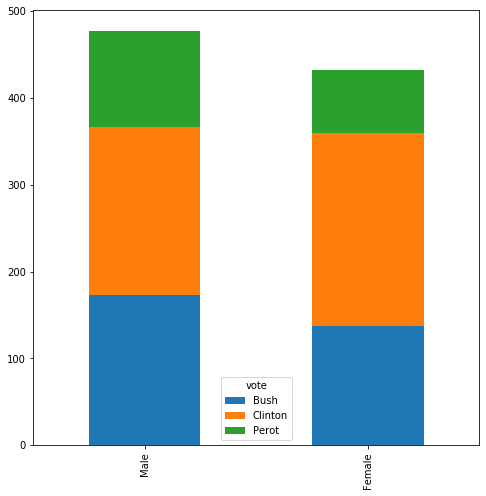

In [15]:
trt_sex.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

# Most of the females : 223 out of the total females have given vote choice for Clinton 

# Answer to Question 8 :

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data['vote_Perot'] = data['vote'].apply(lambda x: 1 if x == 'Perot' else 0)

mylogit = smf.glm(formula='vote_Perot ~ rep + female + perotdis', data=data, family=sm.families.Binomial())
res_perot = mylogit.fit()
print(res_perot.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             vote_Perot   No. Observations:                  909
Model:                            GLM   Df Residuals:                      905
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -448.25
Date:                Wed, 18 Mar 2020   Deviance:                       896.50
Time:                        13:27:15   Pearson chi2:                     920.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0353      0.158     -6.541      0.0

# Answer to Question 9 :

In [28]:
predictions = res_perot.predict()
print(predictions[0:10])

[0.20364105 0.20364105 0.1890545  0.23496109 0.10908326 0.06029801
 0.15841042 0.27556488 0.17051938 0.27556488]


# Answer to Question 10 :

Objective of any logit model is to "maximize likelihood estimation"

How do we achieve this objective ?

A probability distribution for the target variable (class label) must be assumed and then a likelihood function defined that calculates the probability of observing the outcome given the input data and the model. 
This function can then be optimized to find the set of parameters that results in the largest sum likelihood over the training dataset.

# Answer to Question 11 :

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data['vote_Clinton'] = data['vote'].apply(lambda x: 1 if x == 'Clinton' else 0)

mylogit = smf.glm(formula='vote_Clinton ~ rep + female + clintondis', data=data, family=sm.families.Binomial())
res_clinton = mylogit.fit()
print(res_clinton.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           vote_Clinton   No. Observations:                  909
Model:                            GLM   Df Residuals:                      905
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -390.28
Date:                Wed, 18 Mar 2020   Deviance:                       780.56
Time:                        13:28:18   Pearson chi2:                     897.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1871      0.150      7.895      0.0

# Answer to Question 12 :

In [30]:
predictions = res_clinton.predict()
print(predictions[0:10])

[0.0927273  0.0927273  0.79417912 0.10901468 0.79565149 0.73597748
 0.81270961 0.09812302 0.05469315 0.09812302]


# Answer to Question 13:

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data['vote_Bush'] = data['vote'].apply(lambda x: 1 if x == 'Bush' else 0)

mylogit = smf.glm(formula='vote_Bush ~ rep + female + bushdis', data=data, family=sm.families.Binomial())
res_bush = mylogit.fit()
print(res_bush.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              vote_Bush   No. Observations:                  909
Model:                            GLM   Df Residuals:                      905
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.84
Date:                Wed, 18 Mar 2020   Deviance:                       701.68
Time:                        13:29:53   Pearson chi2:                     764.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0127      0.223     -9.027      0.0

# Answer to Question 14:

In [33]:
predictions = res_bush.predict()
print(predictions[0:10])

[0.78828537 0.78828537 0.10499647 0.46474388 0.0142197  0.00256204
 0.04903063 0.66393436 0.77439751 0.66393436]


# Answer to Question 15:

Looking at the above summaries for the 3 fitted models each for the candidates : Bush, Perot and Clinton,
we observe female variable has the positive co-efficient for all 3 models and 
Negative Log likelihood is max for Perot and Residual Deviance too

# Answer to Question 16:

In [52]:
data['vote_Bush'] = data['vote'].apply(lambda x: 1 if x == 'Bush' else 0)

# Answer to Question 17:

In [64]:
from scipy import stats
t_stat, p_val = stats.ttest_ind(data['persfinance'],data['vote_Bush'], equal_var=False)
print(t_stat)
print(p_val)

-11.194128454247444
5.808112856876463e-28


In [ ]:
# Observations : 
# The answer is yes, those who viewed their personal finances as improving were more likely to vote for Bush.
# The pvalue indicates that the difference in means between the two groups was highly unlikely to have occured by chance. 
# It is not impossible, but it is highly unlikely so we can declare there is a significant difference.

# Answer to Question 18:

In [50]:
# Get names of indexes for which column vote has Perot
# Filter out these row indexes from dataFrame and creating a second dataframe name : vote92b
vote92b = data[data['vote']!='Perot']

vote92b.shape
#It's got 726 rows now

(726, 9)

# Answer to Question 19:

In [65]:
binomial_logit = smf.glm(formula='vote ~ dem + rep + female + clintondis + bushdis + persfinance + natlecon', data=vote92b, family=sm.families.Binomial())
res_bush_clinton= binomial_logit.fit()
print(res_bush_clinton.summary())

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['vote[Bush]', 'vote[Clinton]']   No. Observations:                  726
Model:                                         GLM   Df Residuals:                      718
Model Family:                             Binomial   Df Model:                            7
Link Function:                               logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -179.55
Date:                             Wed, 18 Mar 2020   Deviance:                       359.10
Time:                                     14:00:15   Pearson chi2:                     558.
No. Iterations:                                  7                                         
Covariance Type:                         nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]


# Answer to Question: 20 

In [66]:
# Adding gender based interaction variables wrt. idelological distance
binomial_logit = smf.glm(formula='vote ~ dem + rep + female + clintondis + bushdis + persfinance + natlecon+ female : clintondis + female : bushdis', data=vote92b, family=sm.families.Binomial())
res_bush_clinton= binomial_logit.fit()
print(res_bush_clinton.summary())

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['vote[Bush]', 'vote[Clinton]']   No. Observations:                  726
Model:                                         GLM   Df Residuals:                      716
Model Family:                             Binomial   Df Model:                            9
Link Function:                               logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -178.44
Date:                             Wed, 18 Mar 2020   Deviance:                       356.89
Time:                                     14:01:30   Pearson chi2:                     558.
No. Iterations:                                  7                                         
Covariance Type:                         nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0